<h1>Take Home Exam</h1> 
<h3>Development</h3>
Pau Belda-i-Tortosa  |
March 2019

<br>

<h4>Question 1. Factor Input Misallocation in the Village.</h4>

<h5>1.1. Simulation of the administrative data for productivity and capital and joint densities (for $\rho=0$). </h5>

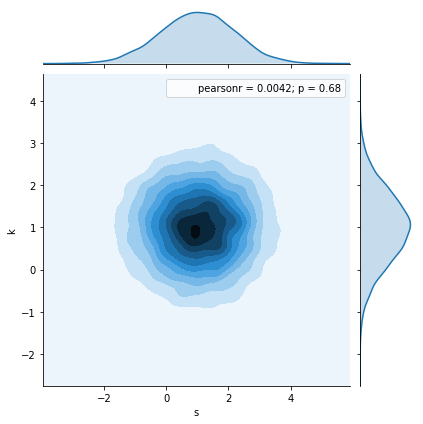

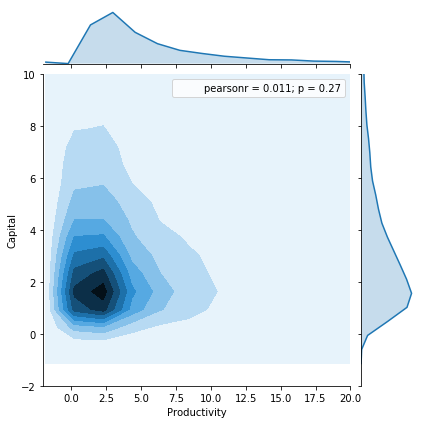

In [4]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)


#Joint Distribution
mean, cov = [1, 1], [(1.416, 0), (0, 0.749)]
data = np.random.multivariate_normal(mean, cov, 10000)
df = pd.DataFrame(data, columns=["s", "k"])
log_K=np.sum(df['k'])
log_k=df['k']
log_s=df['s']
#In level
data_level=np.exp(data)
df_level = pd.DataFrame(data_level, columns=["Productivity", "Capital"])

#Plots
sns.jointplot(x="s", y="k", data=df, kind="kde");
sns.jointplot(x="Productivity", y="Capital", data=df_level, kind="kde",xlim=(-2,20),ylim=(-2,10));

The upper graph shows the joint distribution for logs; the lower graph for levels. As reported, the correlation between productivity and capital is almost zero and non-significant, which is a first signal of misallocation. 

<h4>1.2.Cobb-Douglas output for $\gamma=0.5$.</h4>

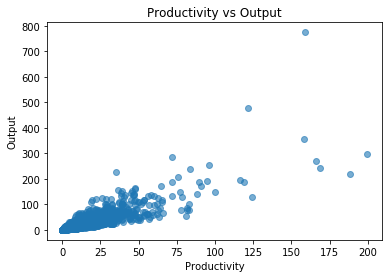

The Pearson correlation (s,y) is 0.87


In [13]:
s=df_level['Productivity']
k=df_level['Capital']
y=s*pow(k,0.5)

plt.scatter(s,y,alpha=0.6)
plt.xlabel('Productivity')
plt.ylabel('Output')
plt.title('Productivity vs Output')
plt.show()
from scipy.stats.stats import pearsonr 
corr=pearsonr(s,y)
print('The Pearson correlation (s,y) is', "{0:.2f}".format(corr[0]))

<h4>1.3.Optimal Capital Allocation problem.</h4>

For solving it, we log-linearize the production function, ending up with a system of 10001 equations (10000 FOC plus the feasibility condition for capital) for 10001 unknowns (a vector of 10000 capital allocations plus the Lagrangean multiplier). 

In [15]:
#Maximize output wrt capital:
gamma=0.5
a=np.identity(10001)*(gamma-1)
a[:,10000]=np.ones((1,10001))*(-1)
a[10000,:]=np.ones((10001))
a[10000,10000]=0

b=np.empty((10001))
for i in range(10000):
    b[i]=-gamma - log_s[i]
b[10000]=log_K

log_k_star=np.linalg.solve(a,b)
log_k_opt=log_k_star[0:10000]

<h4>1.4. Optimal vs. Actual Capital Allocations.</h4>

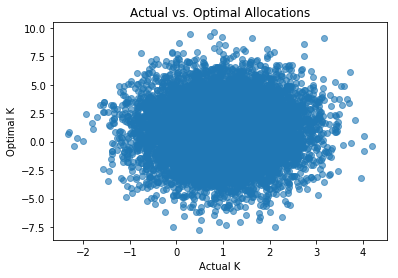

In [16]:
plt.scatter(log_k,log_k_opt, alpha=0.6)
plt.xlabel('Actual K')
plt.ylabel('Optimal K')
plt.title('Actual vs. Optimal Allocations')
plt.show()

Plotting actual against optimal K there is no clear redistributive pattern. A different picture emerges when we plot it against productivity:

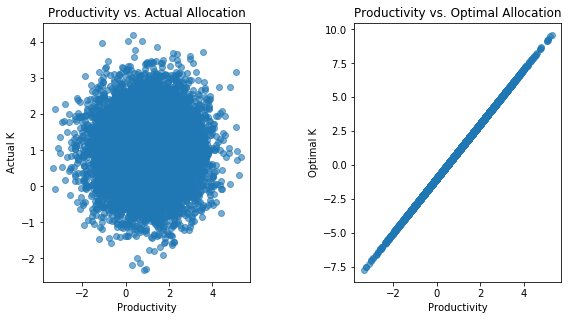

In [18]:
plt.figure
plt.subplots_adjust(top=0.9, bottom=0, left=0.3, right=1.5, wspace=0.5)


plt.subplot(1,2,1)
plt.scatter(log_s,log_k, alpha=0.6)
plt.xlabel('Productivity')
plt.ylabel('Actual K')
plt.title('Productivity vs. Actual Allocation')

plt.subplot(1,2,2)
plt.scatter(log_s,log_k_opt, alpha=0.6)
plt.xlabel('Productivity')
plt.ylabel('Optimal K')
plt.title('Productivity vs. Optimal Allocation')
plt.show()

The optimal allocation gives rise to a linear positive relationship between productivity and capital. In other words, the more productive a firm is the more capital it gets. (Notice that the negative values for K is due to the logarithmic scale. Transformed into levels it is always non-negative). 

<h4>1.5. Output gains.</h4>

In [34]:
k_opt=np.exp(log_k_opt)
y_star=s*pow(k_opt,0.5)
gain=sum(y_star)/sum(y)
print('The aggregate output gain (optimal output/actual output) is equal to', "{0:.4f}".format(gain))

The aggregate output gain (optimal output/actual output) is equal to 7.0011


With an optimal allocation, the output would be 7 times higher! 

<h4>1.6. Redo it assuming $\rho=0.25$.</h4>

For 1.6. and 2 we create a function that reproduces the previous results for the new parameter combinations. 

In [35]:
def misallocation (rho,var_s,var_k,gamma): 
    cov=rho*pow(var_s,0.5)*pow(var_k,0.5)
    mean, cov = [1, 1], [(var_s, cov), (cov, var_k)]
    data = np.random.multivariate_normal(mean, cov, 10000)
    df = pd.DataFrame(data, columns=["s", "k"])
    
    log_K=np.sum(df['k'])
    log_k=df['k']
    log_s=df['s']
    
    #Plot
    #Log
    #sns.jointplot(x="s", y="k", data=df, kind="kde")
    #plt.show()
    
    #Level
    data_level=np.exp(data)
    df_level = pd.DataFrame(data_level, columns=["Productivity", "Capital"])
    #sns.jointplot(x="Productivity", y="Capital", data=df_level, kind="kde",xlim=(-2,20),ylim=(-2,10));
    #plt.show()
    
    #Output
    s=df_level['Productivity']
    k=df_level['Capital']
    y=s*pow(k,gamma)
    
    plt.scatter(s,y,alpha=0.6)
    plt.xlabel('Productivity')
    plt.ylabel('Output')
    plt.title('Productivity vs Output')
    plt.show()
    from scipy.stats.stats import pearsonr 
    corr=pearsonr(s,y)
    print('The Pearson correlation (s,y) is', "{0:.2f}".format(corr[0]))
    
    #Maximize output wrt capital:
    a=np.identity(10001)*(gamma-1)
    a[:,10000]=np.ones((1,10001))*(-1)
    a[10000,:]=np.ones((10001))
    a[10000,10000]=0
    
    b=np.empty((10001))
    for i in range(10000):
        b[i]=-gamma - log_s[i]
    b[10000]=log_K
    
    log_k_star=np.linalg.solve(a,b)
    log_k_opt=log_k_star[0:10000]
    
    #Comparison actual vs optimal capital
    plt.scatter(log_k,log_k_opt,alpha=0.6)
    plt.xlabel('Actual K')
    plt.ylabel('Optimal K')
    plt.title('Actual vs. Optimal Allocations')
    plt.show()
    #There is no a clear redistributive pattern. 
    
    
    plt.figure
    plt.subplots_adjust(top=0.9, bottom=0, left=0.3, right=1.5, wspace=0.5)
    
    
    plt.subplot(1,2,1)
    plt.scatter(log_s,log_k,alpha=0.6)
    plt.xlabel('Productivity')
    plt.ylabel('Actual K')
    plt.title('Productivity vs. Actual Allocation')
    
    plt.subplot(1,2,2)
    plt.scatter(log_s,log_k_opt,alpha=0.6)
    plt.xlabel('Productivity')
    plt.ylabel('Optimal K')
    plt.title('Productivity vs. Optimal Allocation')
    
    plt.show()
    #With the reallocation, a linear positive relation between capital 
    #and productivity emerges. 
    
    #Output gains
    k_opt=np.exp(log_k_opt)
    y_star=s*pow(k_opt,0.5)
    gain=sum(y_star)/sum(y)
    print('The aggregate output gain (optimal output/actual output) is equal to', "{0:.4f}".format(gain))

Now, run it for a correlation (s,k) equal to 0.25:

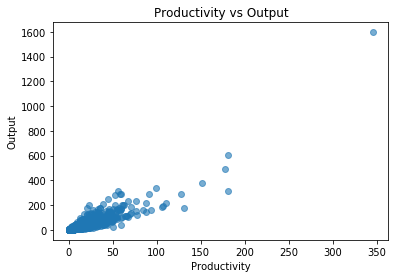

The Pearson correlation (s,y) is 0.90


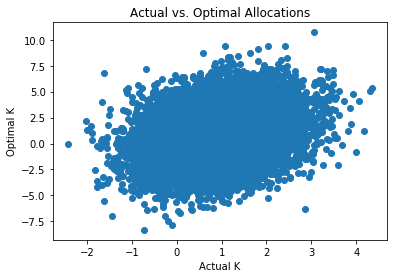

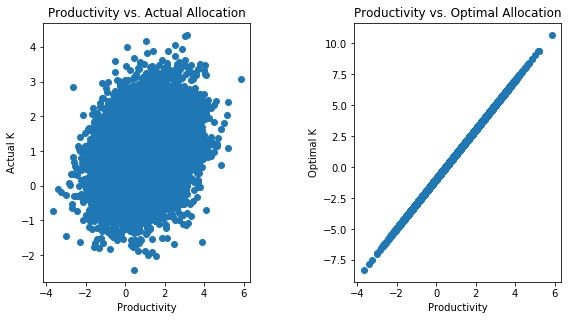

The aggregate output gain (optimal output/actual output) is equal to 6.3905


In [36]:
mis2=misallocation(0.25,1.416,0.749,0.5)

<br/>
<br/>
<br/>
<br/>
<br/>
<h4>Question 2. Higher Span of Control.</h4>

<h5>Redo Q1 for $\{\rho=0, \gamma=0.8\}$.</h5>

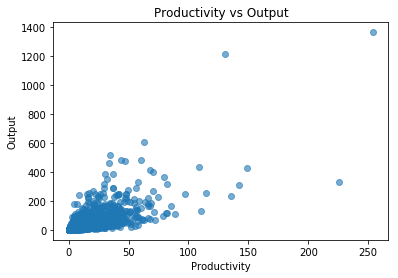

The Pearson correlation (s,y) is 0.76


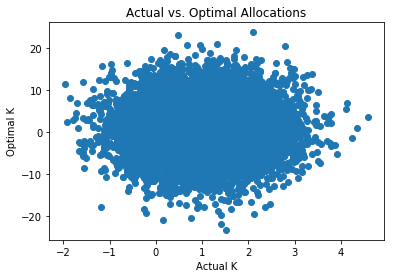

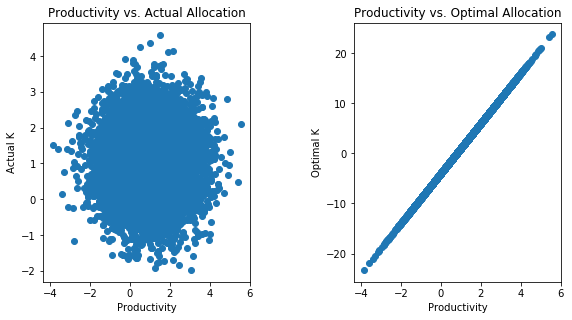

The aggregate output gain (optimal output/actual output) is equal to 734.9102


In [37]:
mis3=misallocation(0,1.416,0.749,0.8)

<h5>Redo Q1 for $\{\rho=0.25, \gamma=0.8\}$.</h5>

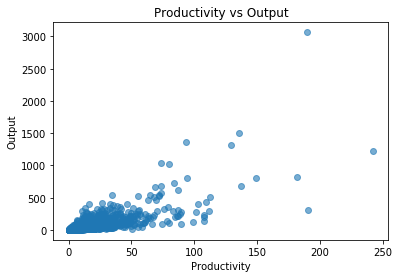

The Pearson correlation (s,y) is 0.77


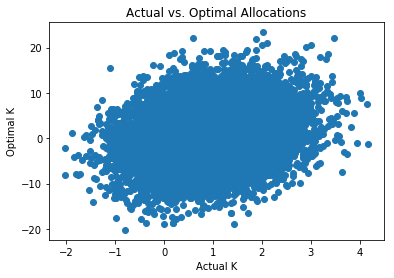

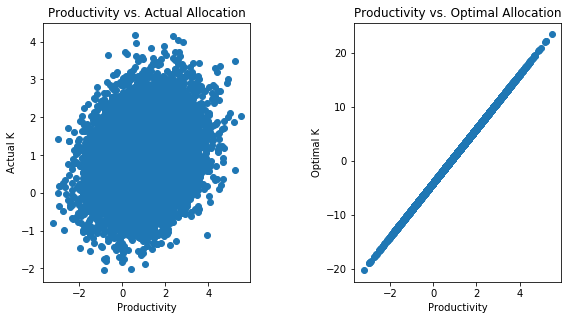

The aggregate output gain (optimal output/actual output) is equal to 671.6587


In [38]:
mis4=misallocation(0.25,1.416,0.749,0.8)

In [39]:
array=np.array([[7.0011,6.3905],[734.9102,671.6587]])
table1=pd.DataFrame(array, index = ['γ=0.5','γ=0.8'], columns = ['ρ=0', 'ρ=0.25'])
table1

,ρ=0,ρ=0.25
γ=0.5,7.0011,6.3905
γ=0.8,734.9102,671.6587


The previous table shows the main results of exercises 1 and 2. Output gains are decreasing in productivity-capital correlation and increasing in the span of control. In other words:

- If actual distribution of capital is more related with idiosyncratic productivity, a reallocation policy delivers lower gains (although they still are substantially high).

- If capital is more important in the production function, improving its allocation delivers much higher gains. 


<br/>
<br/>
<br/>

<h4>Question 3. Random Sampling. </h4>


<h5>3.1. Random sample 10 observations 100 times.</h5>

<h5>3.2. Optimal capital and output gains.</h5>
    
<h5>3.3. Discuss the results.</h5>

Since we do the reallocation exercise 100 times, for the sake of efficiency we avoid plotting all the graphs all the times. Instead, we plot the distribution of income gains across the 100 random samples and report the average correlation of productivity and capital before and after the reallocation takes place. 

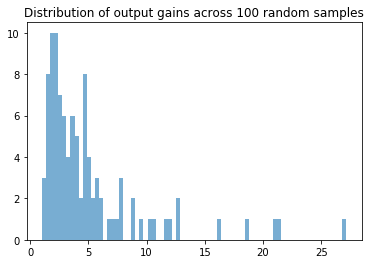

The average productivity-capital correlation BEFORE reallocation is  -0.01
The average productivity-capital correlation AFTER reallocation is  1.00
The average output gain is  5.01
The standard deviation of output gains is 4.59


In [49]:
#Joint Distribution (Q1.1)
mean, cov = [1, 1], [(1.416, 0), (0, 0.749)]
data = np.random.multivariate_normal(mean, cov, 10000)
df = pd.DataFrame(data, columns=["s", "k"])
df = df.reset_index() 
ind=df['index']
capital=df['k']
productivity=df['s']


gains=[]
corr=[]
corr1=[]

np.random.seed( 10 )
random.seed(10)
#100 random sample of 10 individuals. 
for m in range(100):
    sample=np.random.choice(ind, 10)
    log_k=np.asarray(capital[sample])
    log_s=np.asarray(productivity[sample])
    log_K=np.sum(capital[sample])
    
    #Output
    gamma=0.5
    s=np.exp(log_s)
    k=np.exp(log_k)
    y=s*pow(k,gamma)
    
    #Maximize output wrt capital:
    a=np.identity(11)*(gamma-1)
    a[:,10]=np.ones((1,11))*(-1)
    a[10,:]=np.ones((11))
    a[10,10]=0
    
    b=np.empty((11))
    for i in range(10):
        b[i]=-gamma - log_s[i]
    b[10]=log_K
    
    log_k_star=np.linalg.solve(a,b)
    log_k_opt=log_k_star[0:10]
    
    #Reallocation
    cor=pearsonr(log_s,log_k)
    cor1=pearsonr(log_s,log_k_opt)
    
    #Output gains
    k_opt=np.exp(log_k_opt)
    y_star=s*pow(k_opt,0.5)
    gain=sum(y_star)/sum(y)
    
    gains.append(gain)
    corr.append(cor[0])
    corr1.append(cor1[0])

corr_avg=sum(np.asarray(corr))/100
corr1_avg=sum(np.asarray(corr1))/100
gains_avg=sum(np.asarray(gains))/100
gains_std=np.std(np.asarray(gains))

plt.hist(gains,bins=75,alpha=0.6)
plt.title('Distribution of output gains across 100 random samples')
plt.show()

print('The average productivity-capital correlation BEFORE reallocation is ', "{0:.2f}".format(corr_avg))
print('The average productivity-capital correlation AFTER reallocation is ', "{0:.2f}".format(corr1_avg))
print('The average output gain is ', "{0:.2f}".format(gains_avg))
print('The standard deviation of output gains is', "{0:.2f}".format(gains_std))

As the previous lines point out, the average output gain is 30% lower than the administrative output gain. On top of that, the standard deviation is really huge (more than 90% of the average). It sets out that just having an small sample can likely lead to non-representative figures (invalid to make policy inference for the whole population). 

Uninterestingly, I have reported the average productivity-capital correlation. This is something that we have impose (0 before, 1 after). 

<br/>
<br/>
<br/>


<h4>Question 4. Endogenous Productivity. </h4>

<h5>4.1. Output computation. </h5>

Note that when $\sigma=1$, the managerial ability takes a Cobb-Douglas form:

$s(a,k)= a^\alpha k^{(1-\alpha)}$ 

Then, since we have data for k and s, we can recover a. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)

#Parameters

#Joint Distribution
cov=0.25*pow(1.416,0.5)*pow(0.749,0.5)
mean, cov = [1, 1], [(1.416, cov), (cov, 0.749)]
data = np.random.multivariate_normal(mean, cov, 10000)
df = pd.DataFrame(data, columns=["s", "k"])
log_k=df['k']
log_s=df['s']
log_K=np.sum(df['k'])


#Generate the true ability data
alpha=0.5
log_a=1/alpha*(log_s - (1-alpha)*log_k)

#Data in levels
a=np.exp(log_a)
k=np.exp(log_k)

Having a, the production function looks as follows:

$y_i = a_i^\alpha k_i^{(1-\alpha)+\gamma}$

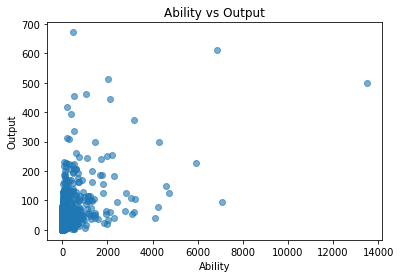

The Pearson correlation (a,y) is 0.52


In [2]:
#Output
gamma=0.5
y=pow(a,alpha)*pow(k,1-alpha)*pow(k,gamma)

plt.scatter(a,y,alpha=0.6)
plt.xlabel('Ability')
plt.ylabel('Output')
plt.title('Ability vs Output')
plt.show()
corr=pearsonr(a,y)
print('The Pearson correlation (a,y) is', "{0:.2f}".format(corr[0]))

The output shows a quite strong positive relation with true ability. 

<br/>

<h5>4.2. Optimal allocation. </h5>

Note that we end up with a pretty similar production function. For the specific parametrization $\alpha = \gamma = 0.5$ it becomes


$y_i = a_i^\alpha k_i$

Then, the FOC look as follows:

$a_i^\alpha = \lambda$ $\forall$ i

Which implies that 

$a_i = a \forall$ i

Knowing that, the system of equations is a bit different (we have the common a instead of the Lagrange multiplier): 

$\Big(s_i k_i^{(\alpha-1)}\Big)^{(1/\alpha)}=a$ $\forall$ i

$\sum_i k_i = K$

We follow the same strategy as before: log-linearize the FOCs and construct a system of 10001 equations for 10001 unknowns. 

In [14]:
#Maximize output wrt capital:
ac=np.identity(10001)
ac[:,10000]=np.ones((1,10001))*(2)
ac[10000,:]=np.ones((10001))
ac[10000,10000]=0

b=np.empty((10001))
for i in range(10000):
    b[i]=2*log_s[i]
b[10000]=log_K

log_k_star=np.linalg.solve(ac,b)
log_k_opt=log_k_star[0:10000]

<br/>

<h5>4.3. Actual vs. Optimal Allocation. </h5>


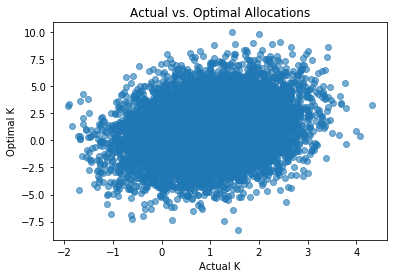

In [15]:
#Optimal vs Actual allocations
plt.scatter(log_k,log_k_opt, alpha=0.6)
plt.xlabel('Actual K')
plt.ylabel('Optimal K')
plt.title('Actual vs. Optimal Allocations')
plt.show()

Exactly as before, it does not look like having a clear redistribution pattern in this graph. For seeing that, we plot ability against capital:

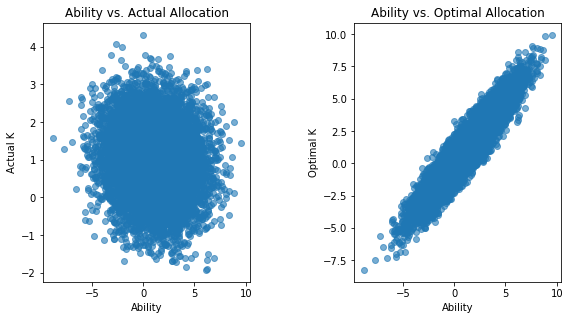

The Pearson correlation (log_a,log_k*) is 0.93


In [17]:
#Capital against productivity
plt.figure
plt.subplots_adjust(top=0.9, bottom=0, left=0.3, right=1.5, wspace=0.5)


plt.subplot(1,2,1)
plt.scatter(log_a,log_k, alpha=0.6)
plt.xlabel('Ability')
plt.ylabel('Actual K')
plt.title('Ability vs. Actual Allocation')

plt.subplot(1,2,2)
plt.scatter(log_a,log_k_opt, alpha=0.6)
plt.xlabel('Ability')
plt.ylabel('Optimal K')
plt.title('Ability vs. Optimal Allocation')
plt.show()

corr=pearsonr(log_a,log_k_opt)
print('The Pearson correlation (log_a,log_k*) is', "{0:.2f}".format(corr[0]))

With the reallocation exercise, the capital is better allocated but the correlation is not exactly one, leaving room for some of misallocation (although much lower than in the beginning). 

<br/>
<br/>

<h5>4.4. Output gains </h5>

In [19]:
#Output gains
k_opt=np.exp(log_k_opt)
y_star=pow(a,alpha)*pow(k_opt,(1-alpha))*pow(k_opt,gamma)
gain=sum(y_star)/sum(y)
print('The aggregate output gain (optimal output/actual output) is equal to', "{0:.4f}".format(gain))

The aggregate output gain (optimal output/actual output) is equal to 124.7189


<br/>
<br/>

<h5>4.5. Redo it for different values of $\sigma$. </h5>

Let's define a function with inputs sigma and alpha and outputs all the previous calculations. 

In [22]:
def ces(sigma, alpha):
    log_a=log_s - log_k - ((sigma-1)/sigma)
    
    
    #Data in levels
    a=np.exp(log_a)
    k=np.exp(log_k)
    
    #Output
    gamma=0.5
    y=pow(alpha*pow(a,((sigma-1)/sigma)) + (1-alpha)*pow(k,((sigma-1)/sigma)),(sigma/(sigma-1)))*pow(k,gamma)
    
    plt.scatter(a,y,alpha=0.6)
    plt.xlabel('Ability')
    plt.ylabel('Output')
    plt.title('Ability vs Output')
    plt.show()
    corr=pearsonr(a,y)
    print('The Pearson correlation (a,y) is', "{0:.2f}".format(corr[0]))
    
    
    #Maximize output wrt capital:
    ac=np.identity(10001)*(gamma-1)
    ac[:,10000]=np.ones((1,10001))*(-1)
    ac[10000,:]=np.ones((10001))
    ac[10000,10000]=0
    
    b=np.empty((10001))
    for i in range(10000):
        b[i]=-gamma - log_s[i]
    b[10000]=log_K
    
    log_k_star=np.linalg.solve(ac,b)
    log_k_opt=log_k_star[0:10000]
    
    #Optimal vs Actual allocations
    plt.scatter(log_k,log_k_opt, alpha=0.6)
    plt.xlabel('Actual K')
    plt.ylabel('Optimal K')
    plt.title('Actual vs. Optimal Allocations')
    plt.show()
    
    #Capital against productivity
    plt.figure
    plt.subplots_adjust(top=0.9, bottom=0, left=0.3, right=1.5, wspace=0.5)
    
    
    plt.subplot(1,2,1)
    plt.scatter(log_a,log_k, alpha=0.6)
    plt.xlabel('Ability')
    plt.ylabel('Actual K')
    plt.title('Ability vs. Actual Allocation')
    
    plt.subplot(1,2,2)
    plt.scatter(log_a,log_k_opt, alpha=0.6)
    plt.xlabel('Ability')
    plt.ylabel('Optimal K')
    plt.title('Ability vs. Optimal Allocation')
    plt.show()
    corr=pearsonr(log_a,log_k_opt)
    print('The Pearson correlation (log_a,log_k*) is', "{0:.2f}".format(corr[0]))
    
    #Output gains
    k_opt=np.exp(log_k_opt)
    y_star=pow(a,alpha)*pow(k_opt,(1-alpha))*pow(k_opt,gamma)
    gain=sum(y_star)/sum(y)
    print('The aggregate output gain (optimal output/actual output) is equal to', "{0:.4f}".format(gain))
    

<br/>

<h5>4.5. $\sigma=0.5, \gamma=0.5$. </h5>

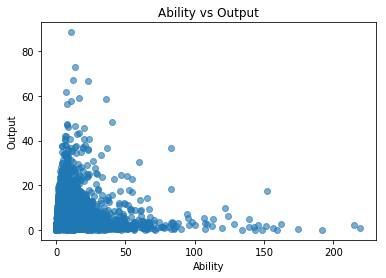

The Pearson correlation (a,y) is 0.08


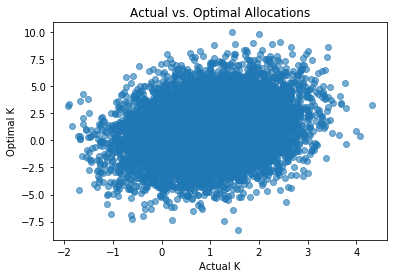

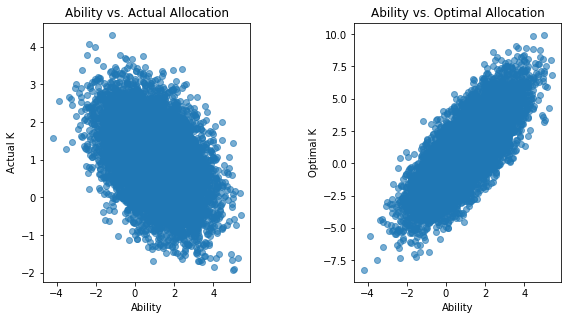

The Pearson correlation (log_a,log_k*) is 0.76
The aggregate output gain (optimal output/actual output) is equal to 56.2612


In [23]:
end1=ces(0.5,0.5)

<br/>

<h5>4.5. $\sigma=2, \gamma=0.5$. </h5>

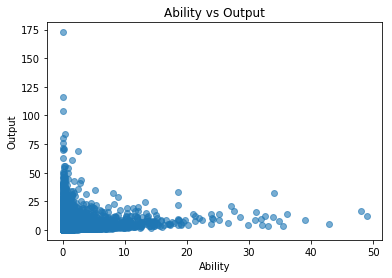

The Pearson correlation (a,y) is 0.06


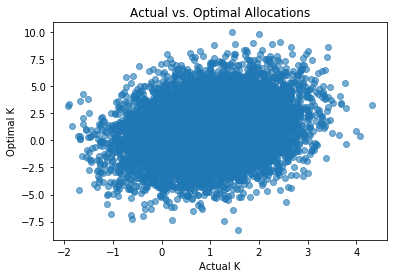

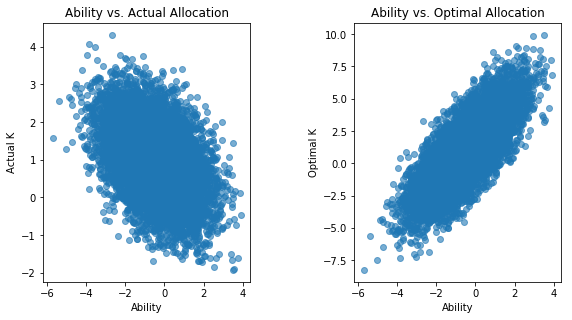

The Pearson correlation (log_a,log_k*) is 0.76
The aggregate output gain (optimal output/actual output) is equal to 28.6265


In [24]:
end2=ces(2,0.5)

<br/>

<h5>4.5. $\sigma=0.5, \gamma=0.8$. </h5>

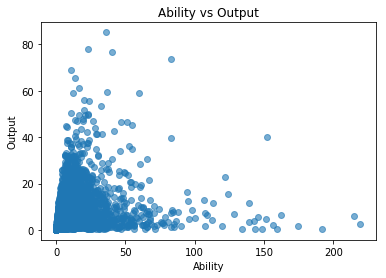

The Pearson correlation (a,y) is 0.29


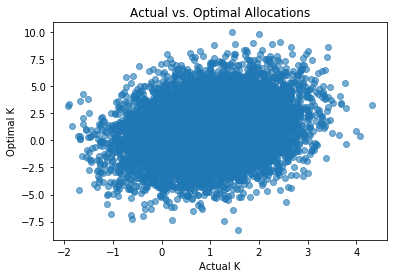

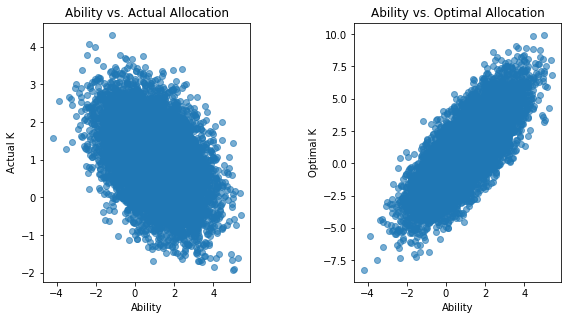

The Pearson correlation (log_a,log_k*) is 0.76
The aggregate output gain (optimal output/actual output) is equal to 19.8448


In [26]:
end2=ces(0.5,0.8)

<br/>

<h5>4.5. $\sigma=2, \gamma=0.8$. </h5>

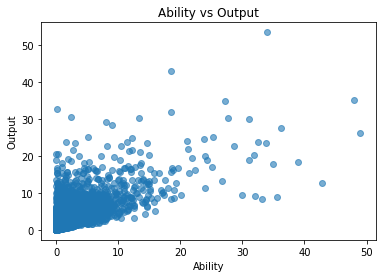

The Pearson correlation (a,y) is 0.66


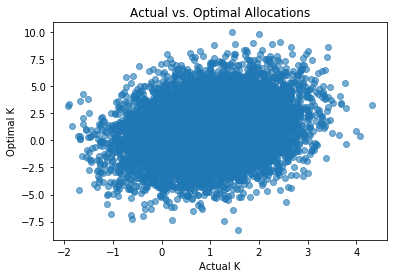

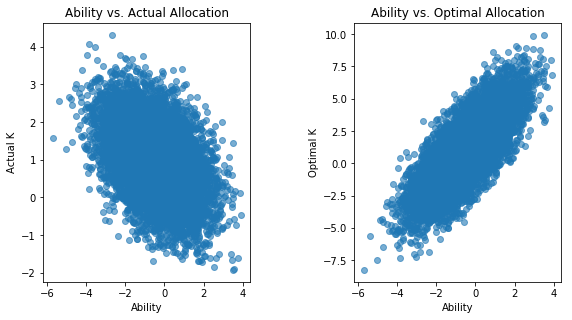

The Pearson correlation (log_a,log_k*) is 0.76
The aggregate output gain (optimal output/actual output) is equal to 12.1606


In [33]:
end4=ces(2,0.8)

In [34]:
array=np.array([[56.2612,124.7189,28.6265],[19.8448,921.2462,12.1606]])
table1=pd.DataFrame(array, index = ['γ=0.5','γ=0.8'], columns = ['σ=0.5', 'σ=1', 'σ=2'])
table1

,σ=0.5,σ=1,σ=2
γ=0.5,56.2612,124.7189,28.6265
γ=0.8,19.8448,921.2462,12.1606


The previous table shows the main results of exercise 4. Some results:
- For the Cobb-Douglas case, increasing the span of control increases output gains. The logic is exactly as before: if capital is more important in the production function, improving its allocation delivers much higher gains.  

- Out of the CD the result seems to be opposite: the more the span of control the less the output gains. 

- On top of that, for $\sigma$ different to 1, increasing $\sigma$ reduces the output gains. The idea is that a higher $\sigma$ translates into higher elasticity of substitution, so a guy with bad abilities but large enough capital might be as efficient as a guy with good abilities and little capital. 